In [5]:
#linear algebra
import numpy as np
#data structures
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('big_data.csv')


# city_to_area = {}
# missing_cities = []


# for i in hh_dt.area:
#     city_rows = data[data.unified_address_city == i].unified_address_state.to_list()
#     if len(city_rows) == 0:
#         missing_cities.append(i)
#         continue
#     city_to_area[i] = city_rows[0]


# hh_dt.drop(index=hh_dt[hh_dt.area.isin(missing_cities)].index, inplace=True)
# hh_dt.area = hh_dt.area.map(city_to_area)

dt = data[['experience_name', 'schedule_name', 'unified_address_state', 'professional_roles_name', 'salary_mean_net',]]


In [8]:
dt['schedule_name'].replace('Сменный график', 0, inplace=True)
dt['schedule_name'].replace('Полный день', 1, inplace=True)
dt['schedule_name'].replace('Гибкий график', 2, inplace=True)
dt['schedule_name'].replace('Вахтовый метод', 3, inplace=True)
dt['schedule_name'].replace('Удаленная работа', 4, inplace=True)

dt['experience_name'].replace('Нет опыта', 0, inplace=True)
dt['experience_name'].replace('От 1 года до 3 лет', 1, inplace=True)
dt['experience_name'].replace('От 3 до 6 лет', 2, inplace=True)
dt['experience_name'].replace('Более 6 лет', 3, inplace=True)

In [9]:
states = []

for i in dt.unified_address_state:
  if i not in states and isinstance(i, int) is False:
    states.append(i)
    dt['unified_address_state'].replace(i, len(states) - 1, inplace=True)



In [10]:
prof = []

for i in dt.professional_roles_name:
  if i not in prof and isinstance(i, int) is False:
    prof.append(i)
    dt['professional_roles_name'].replace(i, len(prof) - 1, inplace=True)


In [31]:
print(prof[17])

руководитель проектов


In [11]:
roles_to_drop = [5]

dt.drop(dt[dt.professional_roles_name.isin(roles_to_drop)].index, inplace=True)
#удаляем строчки, проффесии которых встречаются до 50 раз

ser = dt.unified_address_state.value_counts()
states_to_drop = list(ser[ser < 50].index)

dt.drop(dt[dt.unified_address_state.isin(states_to_drop)].index, inplace=True)
#удаляем строчки, округов которые встречаются до 50 разb

графики


матрица корреляции

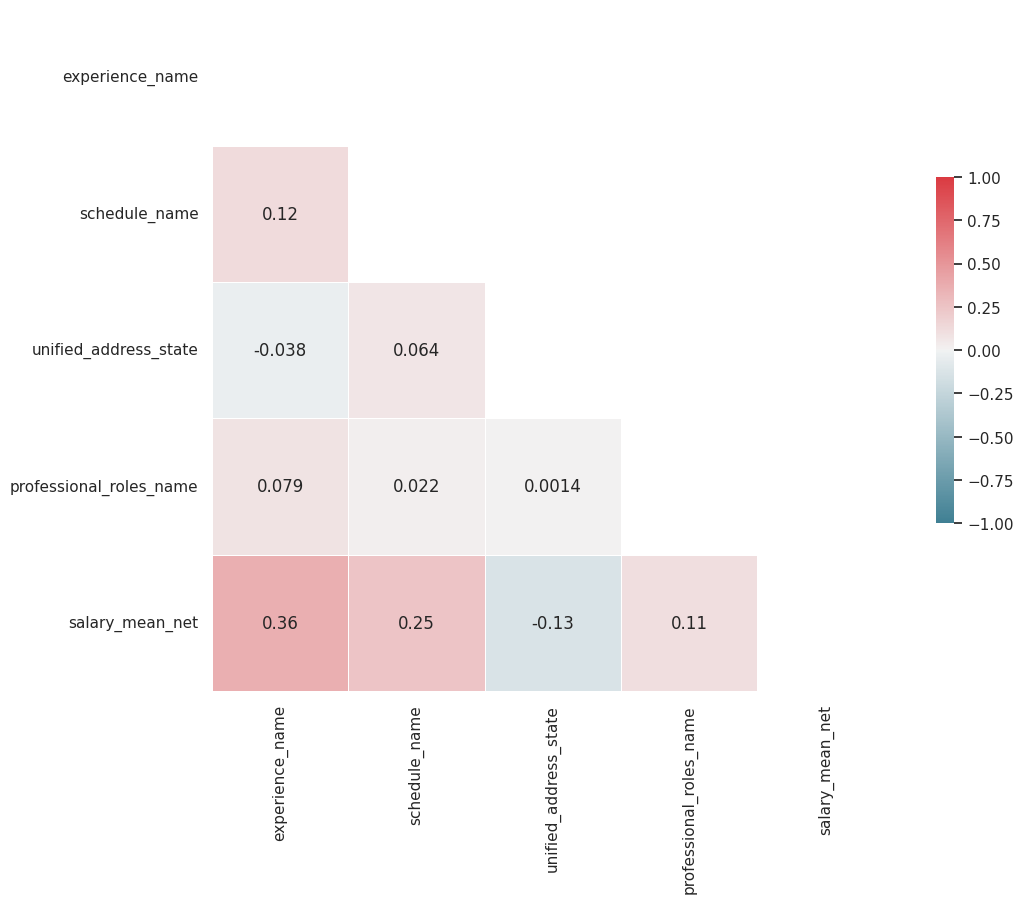

In [12]:
# график исходных данных
import seaborn as sns

sns.set(style="white")
corr = dt.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 11, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio

sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True, vmin=-1, vmax=1)
plt.show()

график зависимости зп от графика


In [13]:
# какой-то прикольный график
import plotly.express as px


fig = px.box(dt, x='schedule_name', y='salary_mean_net')
fig.update_layout(
    autosize=False,
    width=800,
    height=400,
    yaxis_range=[0,150000]
)
fig.show()

fig = px.box(dt, x='schedule_name', y='salary_mean_net')
fig.update_layout(
    autosize=False,
    width=800,
    height=400
)
fig.show()

In [32]:
dt[dt.salary_mean_net >= 1000000]

,experience_name,schedule_name,unified_address_state,professional_roles_name,salary_mean_net
61531,0,2,0,7,1000000.0
61570,3,1,0,166,1300000.0
61811,3,1,0,17,1000000.0


график зависимости зп от опыта

In [30]:
# какой-то прикольный график
import plotly.express as px


fig = px.box(dt, x='experience_name', y='salary_mean_net')
fig.update_layout(
    autosize=False,
    width=800,
    height=400,
    yaxis_range=[0,200000]
)
fig.show()

fig = px.box(dt, x='experience_name', y='salary_mean_net')
fig.update_layout(
    autosize=False,
    width=800,
    height=400
)
fig.show()

In [41]:
dt[dt.salary_mean_net >= 600000]

,experience_name,schedule_name,unified_address_state,professional_roles_name,salary_mean_net
61531,0,2,0,7,1000000.0
61570,3,1,0,166,1300000.0
61693,2,1,0,166,600000.0
61774,3,1,0,166,600000.0
61811,3,1,0,17,1000000.0
62256,1,1,0,94,600000.0


In [36]:
print(prof[94])

директор по маркетингу и pr (cmo)


график зависимости зп от региона

In [39]:
# какой-то прикольный график
import plotly.express as px
plt.figure(figsize = (5,3.5))

fig = px.box(dt, x='unified_address_state', y='salary_mean_net')

fig.show()

<Figure size 500x350 with 0 Axes>

In [40]:
# какой-то прикольный график
import plotly.express as px
plt.figure(figsize = (5,3.5))

fig = px.box(dt[dt.unified_address_state != 0], x='unified_address_state', y='salary_mean_net')

fig.show()

<Figure size 500x350 with 0 Axes>

In [52]:
dt[dt.unified_address_state != 0][dt.salary_mean_net >= 350000]


,experience_name,schedule_name,unified_address_state,professional_roles_name,salary_mean_net
61882,0,1,2,39,450000.0
62158,2,1,15,144,450000.0
62561,2,1,2,75,350000.0
62587,2,1,30,166,400000.0


In [57]:
print(states[30], prof[166])

Ханты-Мансийский автономный округ — Югра генеральный директор, исполнительный директор (ceo)
